In [ ]:
!pip install SimpleITK
!pip install itk-elastix
!pip install nilearn
!pip install medpy

In [1]:
import SimpleITK as sitk
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from nilearn import image,plotting
import numpy as np
import itk
import os

In [16]:
def FiltroMediana(Directorio,Arreglo,Graficar=1,Guardar=1,Factor_brillo=1.5,cortes_z=[18, 31, 51, 64, 76,93,160],nombre="imagen_Filtrada_Mediana.nii.gz"):
    
    # Parámetros de la funcion del filtro de medina :
    #- Directorio (str): puede ser el nombre de la imagen a filtrar, por ejemplo, 'imagen_filtrada_1.nii.gz' en caso de tener el scritp en el misma carpeta, se puede anexar la ruta completa, por ejemplo  'C:/Users/andre/Desktop/Imagenes/filtrado-registro/SubjectA_T1.nii.gz'.
    #- Arreglo (list): Arreglo de tres dimensiones que representa el número de vecinos a considerar para el filtro de mediana.
    #- Graficar (int, opcional): Si es 1, se generará una visualización de las imágenes original y filtrada. Por defecto se grafica.
    #- Guardar (int, opcional): Si es 1, se guardará la imagen filtrada en el directorio actual. Por defecto se guarda.
    # - Factor_brillo (float, opcional): Factor de brillo aplicado a la imagen. Por defecto es 1.5. Esta opción se implementó debido a que las imágenes se observaban muy oscuras, lo que dificultaba la visualización del ruido en la imagen.
    # - cortes_z (list, opcional): Lista de coordenadas z para los cortes de la visualización. Por defecto son [18, 31, 51, 64, 76, 93, 160]. Estos cortes se escogieron de manera arbitraria.

    #Se procede a leer el archivo de imagen proporcionado por la variable 'Directorio'
    imagen = sitk.ReadImage(Directorio)
    
    
    # Implementar el filtro de Mediana teniendo en cuenta el arreglo proporcionado
    imagen_filtrada_Mediana= sitk.Median(imagen,Arreglo)
    
    # Guardar la imagen filtrada incluso si el valor de guardar es 0. En caso de ser 0, el archivo se borra posteriormente.
    sitk.WriteImage(imagen_filtrada_Mediana, nombre)
    
    # Cargar las imágenes para su visualización original como la del filtro de mediana
    imagen_filtrada_Mediana = image.load_img(nombre)
    imagen_original = image.load_img(Directorio)
    
    # Se Obtienen los datos de ambas imágenes
    ImagenFiltradaMediana=imagen_filtrada_Mediana.get_fdata()
    ImagenOriginal= imagen_original.get_fdata()

    # Aplicar el factor de brillo a las imágenes
    FiltroMedianaBrillo = np.clip(ImagenFiltradaMediana*Factor_brillo, 0, 255)
    ImagenOriginalBrillo = np.clip(ImagenOriginal*Factor_brillo, 0, 255)
    
    # Crear imágenes con brillo ajustado
    imagen_brillanteFiltromediana = image.new_img_like(imagen_filtrada_Mediana,FiltroMedianaBrillo)
    imagen_brillanteimagen_original = image.new_img_like(imagen_original,ImagenOriginalBrillo)
    
    # Título para la imagen original con brillo ajustado
    tituloOriginal="Imagen Original a "+str(Factor_brillo)+" de Brillo"
     
    # Eliminar la imagen filtrada si Guardar es igual a cero en caso contrario se mantiene la imagen sin el brillo 
    if Guardar==0:
        os.remove(nombre)

    # Generar visualización si graficar es iguial a 1 
    if Graficar==1:
        for corte_z in cortes_z:
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            plotting.plot_anat(imagen_brillanteFiltromediana , title='Filtro Mediana '+'Arreglo '+str(Arreglo), dim=0, display_mode='z', cut_coords=[corte_z],axes=axes[1])
            plotting.plot_anat(imagen_brillanteimagen_original, title=tituloOriginal, dim=0, display_mode='z',cut_coords=[corte_z], axes=axes[0])
        plt.show()
# NOTA: Es importante aclarar que la imagen que se guarda es una imagen sin el aumento de intensidad (+brillo), ya que esta opción solo sirve para mejorar la visualización de las imágenes cargadas.
# Ejemplo de uso:
# FiltroMediana("SubjectA_T2.nii.gz", Arreglo=[3, 3, 3], Graficar=1, Guardar=0, Factor_brillo=1.7)

Ahora, procedemos a hacer el filtrado con una de las imagenes anatomicas resultantes de la conversion a BIDS, mas especificamente el paciente sub-001, con la imagen SAG_3D_T1.

In [15]:
def FiltroGaussiano(Directorio,sigma,Graficar=1,Guardar=1,Factor_brillo=1.5,cortes_z=[18, 31, 51, 64, 76,93,160],nombre="imagen_Filtrada_Gaussian.nii.gz"):
    # Parámetros a filtro gaussiano:
    #- Directorio (str): La ruta o nombre de archivo de la imagen a filtrar.
    #- sigma (float): El valor del parámetro sigma para el filtro gaussiano.
    #- Graficar (int, opcional): Si es 1, se generará una visualización de las imágenes original y filtrada. Por defecto se grafica.
    #- Guardar (int, opcional): Si es 1, se guardará la imagen filtrada en el directorio actual. Por defecto se guarda.
    #- Factor_brillo (float, opcional): Factor de brillo aplicado a la imagen. Por defecto es 1.5.
    # - cortes_z (list, opcional): Lista de coordenadas z para los cortes de la visualización. Por defecto son [18, 31, 51, 64, 76, 93, 160]. Estos cortes se escogieron de manera arbitraria.
    
    # Cargar la imagen
    imagen = image.load_img(Directorio)
     
    # Se Obtienen los datos de la imagen 
    imagen_data = imagen.get_fdata()
    # Aplicar el filtro gaussiano
    imagen_filtrada_data = gaussian_filter(imagen_data, sigma)
    # Aplicar el factor de brillo
    imagen_filtrada_gaussiano = np.clip(imagen_filtrada_data*Factor_brillo, 0, 255)
    ImagenOriginalBrillo = np.clip(imagen_data*Factor_brillo, 0, 255)

    # Crear imágenes con brillo ajustado,como imagen sin brillo 
    imagen_filtrada = image.new_img_like(imagen, imagen_filtrada_data)
    imagen_filtradBrillo = image.new_img_like(imagen, imagen_filtrada_gaussiano)
    ImagenOriginalBrillo = image.new_img_like(imagen, ImagenOriginalBrillo)
    
    # Título para la imagen original con brillo ajustado
    tituloOriginal="Imagen Original a "+str(Factor_brillo)+" de Brillo"

    # Guardar la imagen filtrada si guardar es iguial a 1
    if Guardar==1:
        imagen_filtrada.to_filename(nombre)
    # Graficar la imagenes filtrada como original ,si guardar es iguial a 1
    if Graficar==1:
        for corte_z in cortes_z:   
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            plotting.plot_anat(imagen_filtradBrillo , title='Filtro Gaussiano valor de sigma: '+str(sigma), dim=0, display_mode='z', cut_coords=[corte_z],axes=axes[1])
            plotting.plot_anat(ImagenOriginalBrillo, title=tituloOriginal, dim=0, display_mode='z',cut_coords=[corte_z], axes=axes[0])
        plt.show()

# NOTA: Es importante aclarar que la imagen que se guarda es una imagen sin el aumento de intensidad (+brillo), ya que esta opción solo sirve para mejorar la visualización de las imágenes cargadas.
# Ejemplo de uso:
# FiltroGaussiano("SubjectA_T2.nii.gz", sigma=1, Graficar=1, Guardar=1, Factor_brillo=1.2,cortes_z=[18, 31, 51])

In [4]:
def FuncionFiltros(TipoFiltro,Directorio,Arreglo=None,sigma=None,Graficar=1,Guardar=1,Factor_brillo=1.5,cortes_z=[18, 31, 51, 64, 76,93,160]):
    
    #Parámetros:
    #- TipoFiltro (int): Indica el tipo de filtro a aplicar. 1 para filtro de mediana, 0 para filtro gaussiano.
    #- Directorio (str): La ruta o nombre de archivo de la imagen a filtrar.
    #- Arreglo (list, opcional): Arreglo de vecindad para el filtro de mediana. Por defecto es None.
    #- sigma (float, opcional): Valor del parámetro sigma para el filtro gaussiano. Por defecto es None.
    #- Graficar (int, opcional): Si es 1, se generará una visualización de las imágenes original y filtrada. Por defecto es 1.
    #- Guardar (int, opcional): Si es 1, se guardará la imagen filtrada en el directorio actual. Por defecto es 1.
    #- Factor_brillo (float, opcional): Factor de brillo aplicado a la imagen. Por defecto es 1.5.
    #- cortes_z (list, opcional): Lista de coordenadas z para los cortes de la visualización. Por defecto son [18, 31, 51, 64, 76, 93, 160].

    if (TipoFiltro==1):
        # Ejecutar el filtro de mediana 
        FiltroMediana(Directorio=Directorio,Arreglo=Arreglo,Graficar=Graficar,Guardar=Guardar,Factor_brillo=Factor_brillo,cortes_z=cortes_z)
    elif(TipoFiltro==0):
        # Ejecutarel  Filtro Gaussiano
        FiltroGaussiano(Directorio,sigma,Graficar=Graficar,Guardar=Guardar,Factor_brillo=Factor_brillo,cortes_z=cortes_z)

#Ejemplo de uso:
#FuncionFiltros(0,"SubjectA_T1.nii.gz",sigma=1,Guardar=1,Graficar=0)

UNAVEZ DEFINIDAS LAS RESPECTIVAS FUNCIONES PARA LOS FILTROS, PROCEDEMOS A APLICARLO, SE APLICARAN UNO A LA VEZ, Y POSTEIORMENTE LOS DOS AL TIEMPO.

Procedemos entonces a hacer el filtrado con una de las imagenes anatomicas resultantes de la conversion a BIDS, mas especificamente el paciente sub-001, con la imagen SAG_3D_T1.

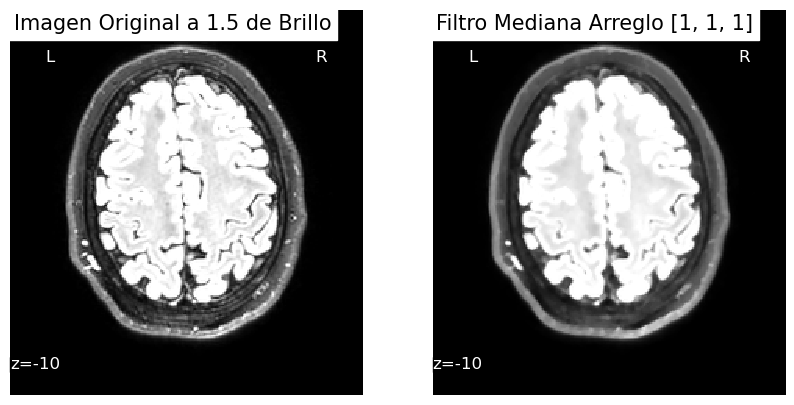

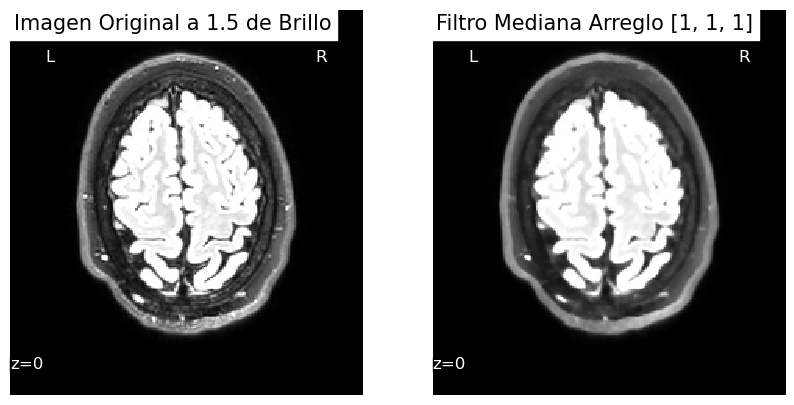

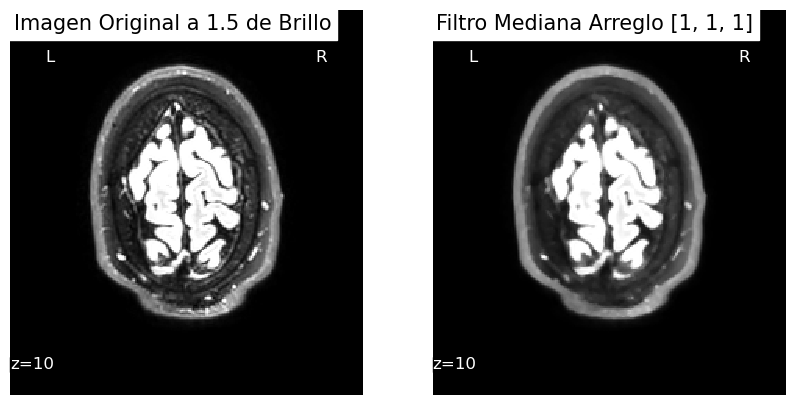

In [17]:
directorio="sub-0001_FLAIR_SAG_3D.nii.gz"
arreglo=[1,1,1]
FiltroMediana(directorio,arreglo,Graficar=1,Guardar=1,Factor_brillo=1.5,cortes_z=[-10, 0, 10],nombre="imagen_filtrada_mediana_sub1.nii.gz")

COMO SE OBSERVA, EL FILTRO PRODUCE CIERTA PERDIDA DE INFORMACION DE LOS BORDES, OCASIONANDO UNA INDISTINGUIBILIDAD DE LAS ESTRUCTURAS PRESENTES, AUNQUE SE DEBE MENCIONAR, EL RUIDO PRESENTE EN LA PERIFERIA DE LA IMAGEN (LO QUE VENDRIA SIENDO EL CRANEO) QUE SE NOTA COMO ZONAS BLANCAS (NO RUIDO DE SAL Y PRIMIENTA) SE ATENUA, MOSTRANDO LAS ESTRUCTURAS ALGO MAS HOMOGENEAS. SE INTENTO USAR OTROS VALORES PARA EL ARREGLO QUE SE LE INGRESA A LA FUNCION DEL FILTRO, RESULTANDO EL [1,1,1] EL QUE PRODUCE EL MAYOR FILTRO DE RUIDO Y LA MENOR PERDIDA DE INFORMACION EN LOS BORDES
TENIENDO ELLO EN CUENTA, PROCEDEMOS ENTONCES A APLICAR EL FILTRO GAUSSIANO:
(Se visualizaran los mismos cortes en Z para poder realizar una adecuada comparacion de los filtros)

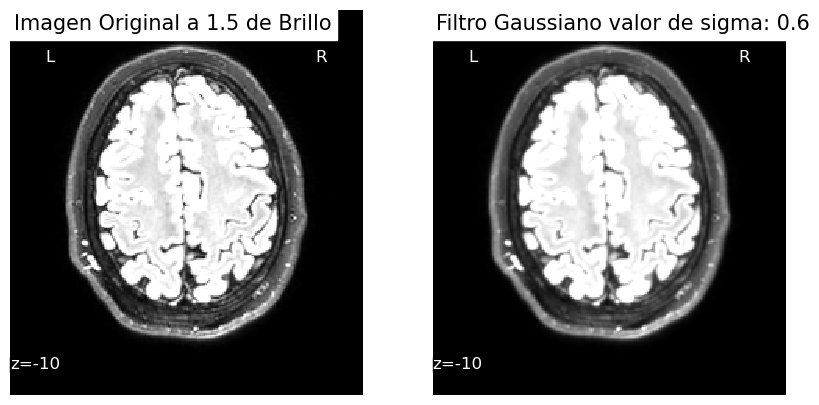

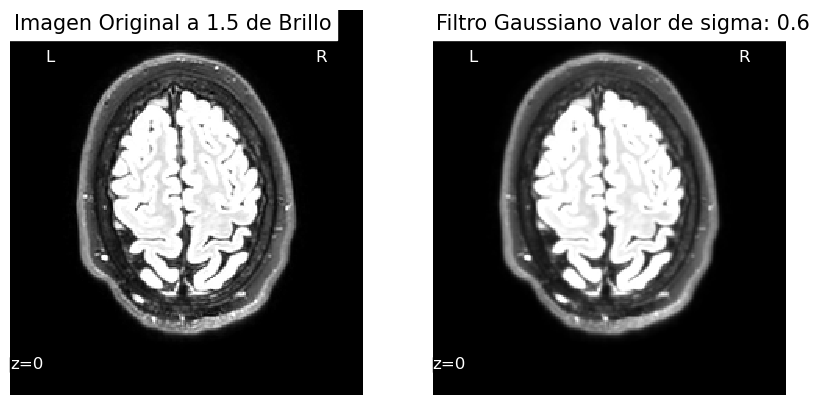

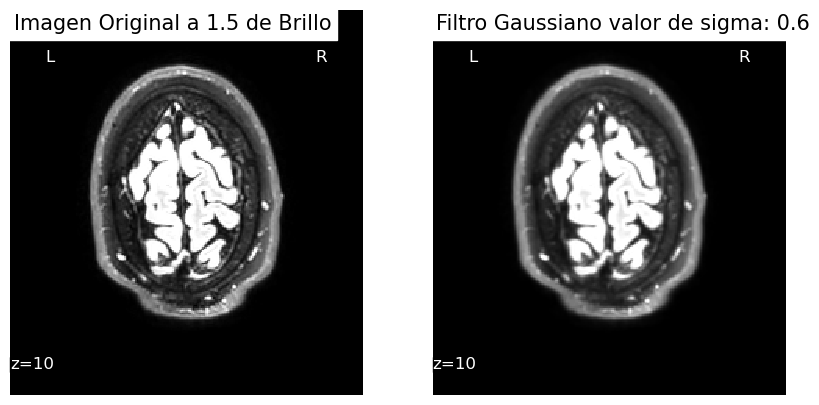

In [18]:
sigma=0.6
FiltroGaussiano(directorio,sigma,Graficar=1,Guardar=1,Factor_brillo=1.5,cortes_z=[-10, 0, 10],nombre="imagen_filtrada_gaussian_sub01.nii.gz")

COMO SE OBSERVA, AL USAR EL FILTRO GAUSSINO CON UN VALOR DE SIGMA=0.6, SOBRE LA MISMA IMAGEN Y OBSERVANDO LOS MISMOS CORTES EN Z (PARA COMPARARA DECUADAMENTE CON EL FILTRO ANTEIOR), SE APRECIA UN COMPORTAMIENTO PARECIDO AL FILTRO DE MEDIANA, DONDE HAY PERDIDA DE INFORMACION EN LOS BORDES Y CIERTA DIFUMINACIÓN DE LOS MISMOS, PERO NO TAN NOTORIA COMO EN EL FILTRO DE MEDIANA, SE OBSERVA TAMBIEN EL FILTRADO EN LA PERIFERIA DE LA IMAGEN MENCIONADO TAMBIEN EN EL FILTRO ANTERIOR.

EN ESTE FILTRADO SE DEBE MENCIONAR, NO HUVO PERDIDA DE CIERTAS ESTRUCTURAS COMO LOS PLIEGUES QUE SE ENCUENTRAN ALREDEDOR DEL TEJIDO CEREBRAL, COMO SI OCURRIO EN EL FILTRO DE MEDIANA EL CUAL HOMOGENEIZO TODA ESA ZONA.
SE PROBÓ EL FILTRO CON DIFERENTES VALORES DE SIGMA, SIENDO EL SIGMA=0.6 AQUEL QUE MEJOR FUNCIONO Y MEJOR PRODUJO PERDIDA DE INFORMACIÓN.

TENIENDO TODOS ESOS FACTORES EN CUENTA: MENOR PERDIDA DE INFORMACION EN LOS BORDES, FILTRADO EN EL RUIDO PRESENTE EN ESTRUCTURAS ALEDAÑAS AL CRANEO (PARECIDO AL FILTRADO DE LA MEDIANA), Y PRESERVACION DE CIERTAS ESTRUCTURAS ALREDEDOR DEL TEJIDO CEREBRAL (duramadre, aracnoide, piamadre) SE CONSIDERA ENTONCES EL FILTRO GAUSSIANO COMO EL MEJOR EN ESTE CASO, COMPARANDOLO UNICAMENTE CON EL DE MEDIANA. 

Es necesario aclarar que para la visualizacion de las imagenes se les aumento el brillo, ello con el proposito de facilitar la observacion de la mejora o deterioro de la imagen original, pero la imagen filtrada que se guarda, no posee tal aumento en el brillo.

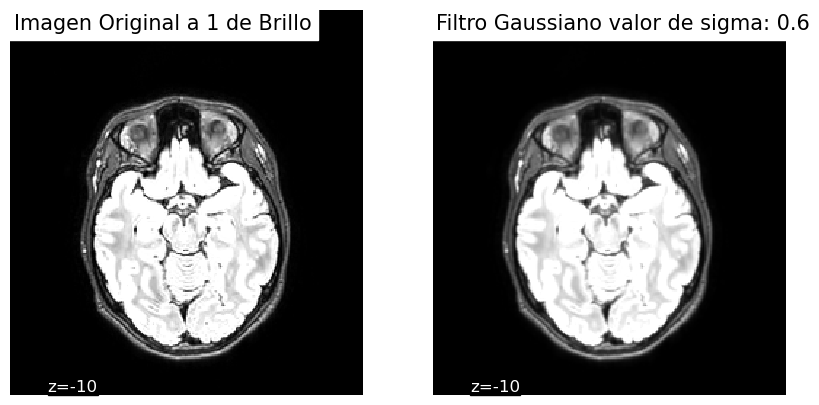

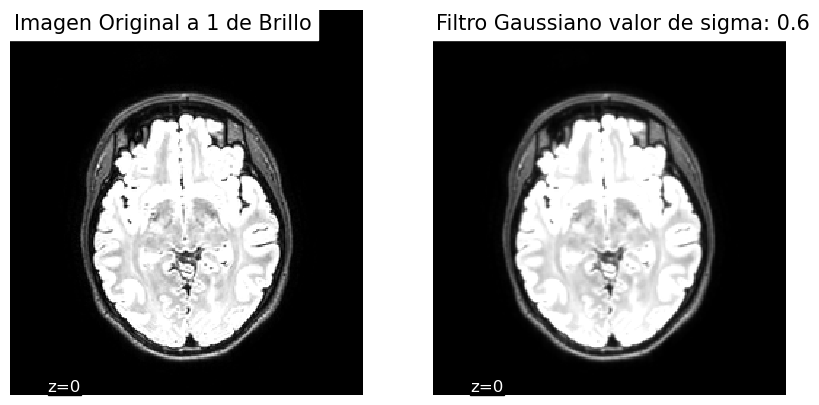

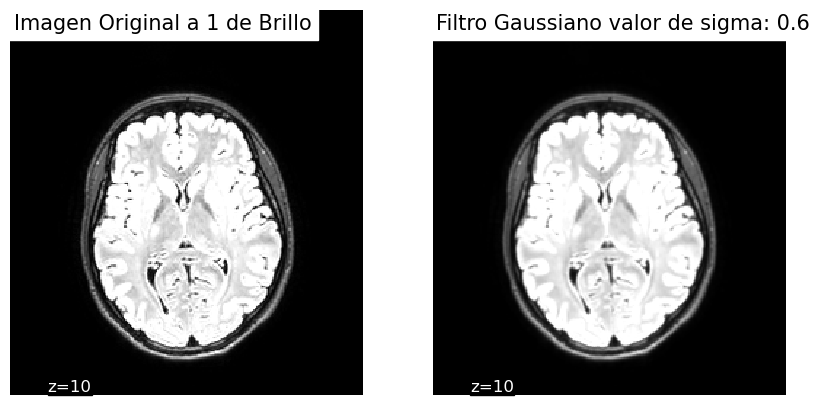

In [20]:
#DADO QUE PARA EL PROCESO DE REGISTRO LAS IMAGENES DEBEN ESTAR FILTRADAS, APLICAMOS EL FILTRAO GAUSSIANO PARA EL SUB0002
directorio="sub-0002_FLAIR_SAG_3D.nii.gz"
sigma=0.6
FiltroGaussiano(directorio,sigma,Graficar=1,Guardar=1,Factor_brillo=1,cortes_z=[-10, 0, 10],nombre="imagen_filtrada_gaussian_sub02.nii.gz")

*REGISTRO*

Para el registro, se optó por usar las imagenes -----, evidentemente una de cada paciente, procediendo entonces de la siguiente manera:

